In [1]:
# !pip install pytesseract

# import library

In [2]:
import pytesseract
import argparse
import cv2
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import nltk
import re 
from nltk.tokenize import word_tokenize 
from nltk.corpus import wordnet
from PIL import Image

# settings pytesseract

In [3]:
pytesseract.pytesseract.tesseract_cmd = "Tesseract-OCR/tesseract.exe"

# read image n extract text

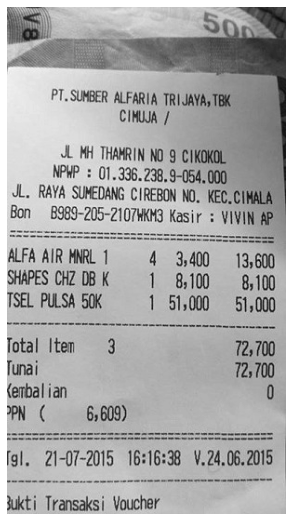

In [4]:
image = cv2.imread("dataset-struk-alfa/struk1.jpg",0 )
plt.figure(figsize=(5,10))
plt.axis("Off")
plt.imshow(image, cmap='gray')

In [5]:
text = (pytesseract.image_to_string(image)).lower()
print(text)

pt. sumber alfaria trijaya, tbk
cimuja / 4

jl hh thamrin no 9 cikokol:
nphp + 01.336,238,9-054.000
jl. raya sumedang cirebon no. kec. cihal
bon  8989-205-2107hkh3 kasir

alfa air hnrl 1 4 3,400 13,600
shapes chzdbk = 18,100 8,100
tsel pulsa 50k 1 51,000 51,000

lotal iten 3 72,700
nai 72,700
(erbal ian 0
pn (

ukti transaksi voucher



# find datetime

In [6]:
match = re.findall(r'\d+[/.-]\d+[/.-]\d+',text)
st= ''
st=st.join(match)
print(st)

9-054.0008989-205-2107


# sentence tokenize from extraction text

In [7]:
nltk.download('punkt',quiet=True)

True

In [8]:
sent_tokens = nltk.sent_tokenize(text)
print(sent_tokens)

['pt.', 'sumber alfaria trijaya, tbk\ncimuja / 4\n\njl hh thamrin no 9 cikokol:\nnphp + 01.336,238,9-054.000\njl.', 'raya sumedang cirebon no.', 'kec.', 'cihal\nbon  8989-205-2107hkh3 kasir\n\nalfa air hnrl 1 4 3,400 13,600\nshapes chzdbk = 18,100 8,100\ntsel pulsa 50k 1 51,000 51,000\n\nlotal iten 3 72,700\nnai 72,700\n(erbal ian 0\npn (\n\nukti transaksi voucher']


# step by step find feature product n price from extraction text

In [9]:
nyari_pakain=[]
for i in sent_tokens:
    if "kasir" in i:
        nyari_pakain.append(i)
nyari_pakain

['cihal\nbon  8989-205-2107hkh3 kasir\n\nalfa air hnrl 1 4 3,400 13,600\nshapes chzdbk = 18,100 8,100\ntsel pulsa 50k 1 51,000 51,000\n\nlotal iten 3 72,700\nnai 72,700\n(erbal ian 0\npn (\n\nukti transaksi voucher']

In [10]:
hasil_nyari_pakain=nyari_pakain[0].split("\n")
hasil_nyari_pakain

['cihal',
 'bon  8989-205-2107hkh3 kasir',
 '',
 'alfa air hnrl 1 4 3,400 13,600',
 'shapes chzdbk = 18,100 8,100',
 'tsel pulsa 50k 1 51,000 51,000',
 '',
 'lotal iten 3 72,700',
 'nai 72,700',
 '(erbal ian 0',
 'pn (',
 '',
 'ukti transaksi voucher']

In [11]:
hasil=[]
for i in range(len(hasil_nyari_pakain)):
    hasil.append(hasil_nyari_pakain[i-1])
    if "lotal" in hasil_nyari_pakain[i]:
        break
        
hasil

['ukti transaksi voucher',
 'cihal',
 'bon  8989-205-2107hkh3 kasir',
 '',
 'alfa air hnrl 1 4 3,400 13,600',
 'shapes chzdbk = 18,100 8,100',
 'tsel pulsa 50k 1 51,000 51,000',
 '']

In [12]:
kasir=[]
for i in range(len(hasil)):
    kasir.append(hasil[i])
    if "kasir" in hasil[i]:
        
        break
        
kasir

['ukti transaksi voucher', 'cihal', 'bon  8989-205-2107hkh3 kasir']

In [13]:
tokens = [token for token in hasil if token not in kasir]
tokens

['',
 'alfa air hnrl 1 4 3,400 13,600',
 'shapes chzdbk = 18,100 8,100',
 'tsel pulsa 50k 1 51,000 51,000',
 '']

# feature product n price

In [14]:
a = []
for i in (tokens):
    if re.findall(r'(\d+(?:\.\d{1,2})?)',i):
        a.append(i)
a

['alfa air hnrl 1 4 3,400 13,600',
 'shapes chzdbk = 18,100 8,100',
 'tsel pulsa 50k 1 51,000 51,000']

In [15]:
words = []            
for i in range(len(a)):
    j = word_tokenize(a[i])+["angka"]
    print(j)
    for k in range(len(j)):
        print(j[k])
        if j[k].isalnum():
            words.append(j[k])
words

['alfa', 'air', 'hnrl', '1', '4', '3,400', '13,600', 'angka']
alfa
air
hnrl
1
4
3,400
13,600
angka
['shapes', 'chzdbk', '=', '18,100', '8,100', 'angka']
shapes
chzdbk
=
18,100
8,100
angka
['tsel', 'pulsa', '50k', '1', '51,000', '51,000', 'angka']
tsel
pulsa
50k
1
51,000
51,000
angka


['alfa',
 'air',
 'hnrl',
 '1',
 '4',
 'angka',
 'shapes',
 'chzdbk',
 'angka',
 'tsel',
 'pulsa',
 '50k',
 '1',
 'angka']

# feature product

In [21]:
f = " ".join(words)
feature = f.split("angka")
feature


['alfa air hnrl 1 4 ', ' shapes chzdbk ', ' tsel pulsa 50k 1 ', '']

In [17]:
selain_words = []
for i in range(len(a)):
    j = word_tokenize(a[i])+["999,999"]
#     print(j)
    for k in range(len(j)):
#         print(j[k])
        if re.findall(r'([0-9]{1,3}(?=\,))',j[k]):
            selain_words.append(j[k])
selain_words

['3,400',
 '13,600',
 '999,999',
 '18,100',
 '8,100',
 '999,999',
 '51,000',
 '51,000',
 '999,999']

# feature price

In [18]:
harganya=[]
for i in range(len(selain_words)):
    if selain_words[i]=="999,999":
        harganya.append(selain_words[i-1])
        continue
# harganya=selain_words[i-1]
# print(harganya)
harganya

['13,600', '8,100', '51,000']

# feature name of corporate

In [19]:
sent_tokens[0:2]
" ".join(sent_tokens[0:2])
for i in " ".join(sent_tokens[0:2]).split('\n'):
    break
head=i
print(head)

pt. sumber alfaria trijaya, tbk


# Make it to Dataframe

In [20]:
data_belanjaan = pd.DataFrame(list(zip(feature, harganya)),
               columns =['Produk', 'Harga'])
data_belanjaan

,Produk,Harga
0,alfa air hnrl 1 4,"13,600"
1,shapes chzdbk,"8,100"
2,tsel pulsa 50k 1,"51,000"


# step selanjutnya :
* perlu penanganan feature extraction seperti word normalization
* perlu penanganan untuk fitur yang gak kebaca ocr, seperti tanggal dan product
* melakukan ekstraksi pada struk yang ada diskon nya.
* kalau bisa ambil fitur kuantitas dari tiap jenis belanjaannya (opsional).
* import semua hasil dari ekstraksi kedalam bentuk csv atau json atau pandas dataframe.
* kalau temen temen punya step yang lebih mujarab silakan direlisasikan aja, biar kita bisa lebih efisien. dan kalau ada yang ingin disampaikan, langsung aja disampaiin di grup ya hehehe.
